# NumPy基础 ：Arrays and Vectorized Computation 数组与向量化计算

In [1]:
import numpy as np
my_arr=np.arange(1000000)
my_list=list(range(1000000))

In [2]:
%time for _ in range(10):my_arr2 = my_arr * 2
%time for _ in range(10):my_list2 = [x*2 for x in my_list]

Wall time: 28.5 ms
Wall time: 839 ms


#### Numpy的方法比Python快10到100倍，使用内存也少

## 4.1 Numpy ndarray：A Multidimensional Array Object 多维数组对象

In [3]:
import numpy as np
#  Generate some random data
#  尽量这样引入，因为numpy里的函数与Python内建函数大量重名
data=np.random.randn(2,3)  #生成2*3
data

array([[-0.16875352, -1.29642123,  0.02337843],
       [ 0.05355164,  1.2899762 ,  0.75830921]])

In [4]:
data * 10  # 每个元素乘以10

array([[ -1.68753515, -12.96421228,   0.23378433],
       [  0.53551637,  12.89976197,   7.58309211]])

In [5]:
data + data  # 对应元素相加

array([[-0.33750703, -2.59284246,  0.04675687],
       [ 0.10710327,  2.57995239,  1.51661842]])

In [6]:
data.shape  # 查看形状，也就是数量几乘几

(2, 3)

In [7]:
data.dtype  # 类型

dtype('float64')

## 4.1.1 生成ndarray
### array接受序列类型对象，生成数组

In [8]:
data1 = [6,7.5,8,0,1]
arr1 = np.array(data1)
arr1

array([ 6. ,  7.5,  8. ,  0. ,  1. ])

In [9]:
data2 = [[1,2,3,4],[5,6,7,8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [10]:
arr2.ndim  # 几维

2

In [11]:
arr2.shape  # 几乘几

(2, 4)

### zeros都是零的数组 

In [12]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [13]:
np.zeros((3,6))

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

### empty未初始化的数组

In [14]:
np.empty((2,3,2))

array([[[  7.77632804e-312,   3.16202013e-322],
        [  0.00000000e+000,   0.00000000e+000],
        [  0.00000000e+000,   2.44549798e-056]],

       [[  2.90253385e+180,   3.73166671e-061],
        [  4.25407611e+174,   6.09992102e+170],
        [  3.11288860e+179,   2.12944834e-052]]])

### arange 未初始化的数组
#### 像range一样

In [15]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 4.1.2 Data Types of ndarrays 数据类型
### dtype 定义数据类型
### astype 转换数据类型

In [16]:
arr1 = np.array([1,2,3], dtype=np.float64)
arr2 = np.array([1,2,3], dtype=np.int32)
print(arr1.dtype)
print(arr2.dtype)

float64
int32


In [17]:
arr = np.array([1,2,3,4,5])
print(arr.dtype)
float_arr = arr.astype(np.float64)
print(float_arr.dtype)

int32
float64


### 使用另外一个数组的dtype属性

In [19]:
int_array = np.arange(10)
calibers = np.array([.22,.270,.357,.380,.44,.50],dtype=np.float64)
int_array.astype(calibers.dtype)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

### 使用类型代码来传入数据类型

In [21]:
empty_uint32 = np.empty(8,dtype='u4')
empty_uint32

array([1942094320,        366,   42483824,        366,   42483856,
              366,   42483888,        366], dtype=uint32)

## 4.1.3 Arithmetic with NumPy Arrays 数组计算
#### 任何在两个等尺寸数组之间的算术操作都应用了逐元素操作的方式
#### 带有标量计算的算术操作，会把计算参数传递给数组的每一个元素
#### 同尺寸数组之间的比较，会产生一个布尔值数组

## 4.1.4 Basic Indexing and Slicing 基础索引与切片
#### 这里不是复制，是取其中一部分的视图，所有的改变都会改变原列表

In [30]:
arr1 = np.arange(10)
arr1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
arr1[5]

5

In [32]:
arr1[5:8]

array([5, 6, 7])

In [33]:
arr1[5:8]=12

In [34]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

#### 想复制用arr[5:8].copy()

### 在多维数组中，每个索引值对应的元素不再是一个值，而是一个数组

In [35]:
arr3d=np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
arr3d  # 2*2*3的数组

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [36]:
arr3d[0]  # 2*3的数组

array([[1, 2, 3],
       [4, 5, 6]])

In [37]:
old_values=arr3d[0].copy() #  原来的列表不会发生改变
arr3d[0]=42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [38]:
arr3d[0]=old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

#### 以上数组的子集选择中，返回的数组都是视图
#### 视图是指与较大数组共享相同数据的较小数组。因为是共享数据，所以修改小数组中的数据会影响大数组

### 4.1.4.1 Indexing with slices 切片索引

In [41]:
arr2d=np.array([[1,2,3],[4,5,6],[7,8,9]])
arr2d[:2]  # 选择前两行,从0开始到2为止，0，1这两行

array([[1, 2, 3],
       [4, 5, 6]])

In [43]:
arr2d[:2,1:]  # 0，1两行，每行从1开始到最后1，2

array([[2, 3],
       [5, 6]])

In [44]:
arr2d[:2,2]  # 前两行的最后一列

array([3, 6])

#### 对切片表达式赋值时，整个切片都会重新赋值

In [45]:
arr2d[:2,1:]=0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

## 4.1.5 布尔索引

In [46]:
names=np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
data=np.random.randn(7,4)
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'],
      dtype='<U4')

In [47]:
data

array([[ 0.07420128, -0.28224852, -0.10585349,  1.04263394],
       [ 0.82647165, -1.45535941, -0.56772044, -0.05456685],
       [ 0.03595348, -1.33610951, -1.74707001, -1.78948132],
       [ 0.50501102,  0.73714506, -0.20388077, -0.84441304],
       [ 1.19812296, -1.05225613,  0.02691778,  0.68435266],
       [ 0.04938806, -0.74895425,  1.7719627 , -0.4817083 ],
       [-0.00466688, -0.80235127,  1.22483155,  1.27683152]])

In [48]:
names=='Bob'

array([ True, False, False,  True, False, False, False], dtype=bool)

In [50]:
data[names=='Bob']
# 这组布尔值传入data
# 作为索引取数组的值

array([[ 0.07420128, -0.28224852, -0.10585349,  1.04263394],
       [ 0.50501102,  0.73714506, -0.20388077, -0.84441304]])

In [51]:
data[names=='Bob',2:]
# 竖着按布尔值取
# 横着按切片索引

array([[-0.10585349,  1.04263394],
       [-0.20388077, -0.84441304]])

In [52]:
names!='Bob'

array([False,  True,  True, False,  True,  True,  True], dtype=bool)

In [53]:
data[~(names=='Bob')]  ## Bob之外的数据

array([[ 0.82647165, -1.45535941, -0.56772044, -0.05456685],
       [ 0.03595348, -1.33610951, -1.74707001, -1.78948132],
       [ 1.19812296, -1.05225613,  0.02691778,  0.68435266],
       [ 0.04938806, -0.74895425,  1.7719627 , -0.4817083 ],
       [-0.00466688, -0.80235127,  1.22483155,  1.27683152]])

#### 可以对多个布尔值条件进行联合，需要使用数学操作符&(and)和|(or)

In [54]:
mask=(names=='Bob')|(names=='Will')
mask

array([ True, False,  True,  True,  True, False, False], dtype=bool)

In [55]:
data[mask]

array([[ 0.07420128, -0.28224852, -0.10585349,  1.04263394],
       [ 0.03595348, -1.33610951, -1.74707001, -1.78948132],
       [ 0.50501102,  0.73714506, -0.20388077, -0.84441304],
       [ 1.19812296, -1.05225613,  0.02691778,  0.68435266]])

#### 基于常识来设置布尔值数组也是可行的

In [56]:
data[data<0]=0  # 判断并赋值，这个本质上也是用了布尔值
data

array([[ 0.07420128,  0.        ,  0.        ,  1.04263394],
       [ 0.82647165,  0.        ,  0.        ,  0.        ],
       [ 0.03595348,  0.        ,  0.        ,  0.        ],
       [ 0.50501102,  0.73714506,  0.        ,  0.        ],
       [ 1.19812296,  0.        ,  0.02691778,  0.68435266],
       [ 0.04938806,  0.        ,  1.7719627 ,  0.        ],
       [ 0.        ,  0.        ,  1.22483155,  1.27683152]])

## 4.1.6 Fancy Indexing 神奇索引

In [57]:
arr=np.empty((8,4))
for i in range(8):
    arr[i]=i  # 如果arr[0]=0,就是0-7行里面的第0行，全部元素等于0
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

In [58]:
arr[[4,3,0,6]]
##  用列表或数组做索引
##  取的就是相应的行
##  这里取的就是axis=0

array([[ 4.,  4.,  4.,  4.],
       [ 3.,  3.,  3.,  3.],
       [ 0.,  0.,  0.,  0.],
       [ 6.,  6.,  6.,  6.]])

In [59]:
arr[[-3,-5,-7]]  #倒数也可以

array([[ 5.,  5.,  5.,  5.],
       [ 3.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.]])

In [60]:
arr=np.arange(32).reshape((8,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [61]:
arr[[1,5,7,2],[0,3,1,2]]
# (1,0)=4
# (5,3)=23
# (7,1)=29
# (2,2)=10
# 这里先取axis=0,再取axis=1

array([ 4, 23, 29, 10])

In [63]:
arr[[1,5,7,2]][:,[0,3,1,2]]
#  第一行都取出来，按4，7，5，6的顺序
#  第五行都取出来，20，23，21，22的顺序

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

## 4.1.7 Transposing Arrays and Swapping Axes 数组转置和换轴

In [2]:
import numpy as np
arr=np.arange(15).reshape((3,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [3]:
arr.T  # 转置

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [6]:
arr=np.random.randn(2,3)
arr

array([[ 1.55492751, -0.02440836, -0.82669917],
       [ 0.54787995, -0.03806662,  0.01975012]])

In [7]:
np.dot(arr.T,arr)  # 矩阵内积

array([[  2.71797199e+00,  -5.88091730e-02,  -1.27463658e+00],
       [ -5.88091730e-02,   2.04483579e-03,   1.94265531e-02],
       [ -1.27463658e+00,   1.94265531e-02,   6.83821583e-01]])

### transpose方法可以接收包含轴编号的元组

In [8]:
arr=np.arange(16).reshape((2,2,4))
#  现在是2*2*4
#  (1,0,0)=8
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [10]:
arr.transpose((1,0,2))
#  现在轴有三个,0,1,2
#  现在换一下头两个
#  现在是2*2*4
#  (0,1,0)=8

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [11]:
arr                
#  现在是2*2*4

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [12]:
arr.swapaxes(1,2)
#  现在是2*4*2
#  曾经的(0,0,0)=0变成(0,0,0)=0
#  曾经的(0,1,2)=0变成(0,2,1)=6

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## 4.2 Universal Functions:Fast Element-Wise Array Functions(通用函数:快速的逐元素数组函数)
#### 通用函数，就是对数组的每一个数都进行相同处理的函数

In [13]:
arr=np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
np.sqrt(arr)  # 根号

array([ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ,
        2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ])

In [15]:
np.exp(arr)  # e的n次方

array([  1.00000000e+00,   2.71828183e+00,   7.38905610e+00,
         2.00855369e+01,   5.45981500e+01,   1.48413159e+02,
         4.03428793e+02,   1.09663316e+03,   2.98095799e+03,
         8.10308393e+03])

### modf 返回一个浮点值数组小数部分和整数部分

In [16]:
arr=np.random.randn(7)*5  # 每个元素都乘以5
arr

array([-3.69896753,  6.8875666 ,  0.73247619, -3.27110728,  3.95516795,
       -4.75802688,  0.85843727])

In [17]:
remainder,whole_part=np.modf(arr)  # 将浮点数分为小数和整数

In [18]:
remainder  # 小数部分

array([-0.69896753,  0.8875666 ,  0.73247619, -0.27110728,  0.95516795,
       -0.75802688,  0.85843727])

In [19]:
whole_part  # 整数部分

array([-3.,  6.,  0., -3.,  3., -4.,  0.])

In [20]:
arr

array([-3.69896753,  6.8875666 ,  0.73247619, -3.27110728,  3.95516795,
       -4.75802688,  0.85843727])

In [21]:
np.sqrt(arr)  # 负数不能开根号，返回nan,原数组没有改变

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([        nan,  2.62441738,  0.85584823,         nan,  1.9887604 ,
               nan,  0.9265189 ])

In [22]:
np.sqrt(arr,arr)  # 将改变的值赋给arr

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([        nan,  2.62441738,  0.85584823,         nan,  1.9887604 ,
               nan,  0.9265189 ])

In [23]:
arr

array([        nan,  2.62441738,  0.85584823,         nan,  1.9887604 ,
               nan,  0.9265189 ])

## 4.3 Array_Oriented Programming with Arrays 面向数组的programming

In [25]:
points=np.arange(-5,5,0.1)
#  100 equally spaced points
#  从-5到5，精度0.1，共100个数
points

array([ -5.00000000e+00,  -4.90000000e+00,  -4.80000000e+00,
        -4.70000000e+00,  -4.60000000e+00,  -4.50000000e+00,
        -4.40000000e+00,  -4.30000000e+00,  -4.20000000e+00,
        -4.10000000e+00,  -4.00000000e+00,  -3.90000000e+00,
        -3.80000000e+00,  -3.70000000e+00,  -3.60000000e+00,
        -3.50000000e+00,  -3.40000000e+00,  -3.30000000e+00,
        -3.20000000e+00,  -3.10000000e+00,  -3.00000000e+00,
        -2.90000000e+00,  -2.80000000e+00,  -2.70000000e+00,
        -2.60000000e+00,  -2.50000000e+00,  -2.40000000e+00,
        -2.30000000e+00,  -2.20000000e+00,  -2.10000000e+00,
        -2.00000000e+00,  -1.90000000e+00,  -1.80000000e+00,
        -1.70000000e+00,  -1.60000000e+00,  -1.50000000e+00,
        -1.40000000e+00,  -1.30000000e+00,  -1.20000000e+00,
        -1.10000000e+00,  -1.00000000e+00,  -9.00000000e-01,
        -8.00000000e-01,  -7.00000000e-01,  -6.00000000e-01,
        -5.00000000e-01,  -4.00000000e-01,  -3.00000000e-01,
        -2.00000000e-01,

In [26]:
xs,ys=np.meshgrid(points,points)
ys

array([[-5. , -5. , -5. , ..., -5. , -5. , -5. ],
       [-4.9, -4.9, -4.9, ..., -4.9, -4.9, -4.9],
       [-4.8, -4.8, -4.8, ..., -4.8, -4.8, -4.8],
       ..., 
       [ 4.7,  4.7,  4.7, ...,  4.7,  4.7,  4.7],
       [ 4.8,  4.8,  4.8, ...,  4.8,  4.8,  4.8],
       [ 4.9,  4.9,  4.9, ...,  4.9,  4.9,  4.9]])

In [28]:
z=np.sqrt(xs ** 2 + ys ** 2)
z

array([[ 7.07106781,  7.00071425,  6.93108938, ...,  6.86221539,
         6.93108938,  7.00071425],
       [ 7.00071425,  6.92964646,  6.85930026, ...,  6.78969808,
         6.85930026,  6.92964646],
       [ 6.93108938,  6.85930026,  6.7882251 , ...,  6.71788657,
         6.7882251 ,  6.85930026],
       ..., 
       [ 6.86221539,  6.78969808,  6.71788657, ...,  6.64680374,
         6.71788657,  6.78969808],
       [ 6.93108938,  6.85930026,  6.7882251 , ...,  6.71788657,
         6.7882251 ,  6.85930026],
       [ 7.00071425,  6.92964646,  6.85930026, ...,  6.78969808,
         6.85930026,  6.92964646]])

#### 用matplotlib生成这个二维数组的可视化

In [33]:
import matplotlib.pyplot as plt
plt.imshow(z,cmap=plt.cm.gray);plt.colorbar()
plt.title("Image plot of $\sqrt{x^2+y^2}$ for a grid of values")

Text(0.5,1,'Image plot of $\\sqrt{x^2+y^2}$ for a grid of values')

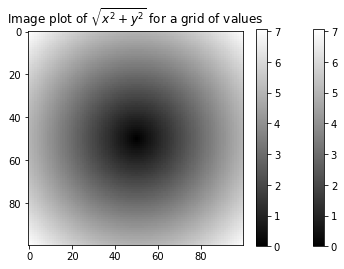

In [36]:
plt.show()